<h1><center> Análise de pellets plásticos como ferramenta para o estudo de permanência de microplásticos em praias arenosas. </center></h1>

Juana Gerevini Bozzetto

## 02. Extraindo histograma 

- Trabalhar com apenas uma imagem, tentado distrinchar o código para ela
- 4 imagens utilizadas: pellet amarelo, amarelo escuro, transparente e erodido
- Extração do histograma de cores
- 3 opções para extração do histograma: 

>**A)** Opção 1: Matplotlib 

>**B)** Opção 2: Scikit-Image 

>**C)** Opção 3: Scikit-Image

In [1]:
# --- Bibliotecas utilizadas na rotina ---#

import os

import matplotlib.pyplot as plt
import numpy as np
import skimage

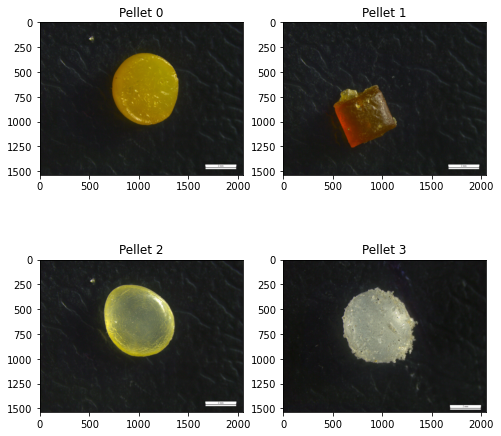

In [2]:
# --- Abrindo o arquivo jpg ---#
from skimage import io  # io é parte do skimage

# --- Imagens para teste ---#

# Pellet 0: Pellet Amarelo Claro
pellet_a = io.imread("fotos_pellets_cp/cl1_p1_psul_deixa1_g0005.jpg")

# Pellet 1: Pellet Amarelo Escuro
pellet_b = io.imread("fotos_pellets_cp/cl1_p1_psul_deixa1_g0007.jpg")

# Pellet 2: Pellet Transparente
pellet_c = io.imread("fotos_pellets_cp/cl1_p1_psul_deixa1_g0006.jpg")

# Pellet 3: Pellet Erodido
pellet_d = io.imread("fotos_pellets_cp/cl1_p2_joaq_dunai_c0010.jpg")

images = [pellet_a, pellet_b, pellet_c, pellet_d]

# --- Mostrar Imagens ---#
plt.figure(figsize=(8, 8))  # definindo tamanho da imagem

for i in range(4):
    plt.subplot(2, 2, i + 1)  # número de imagens no grid (x,y) x = linha, y= coluna
    plt.imshow(images[i])
    plt.title("Pellet %i" % i)

plt.show()

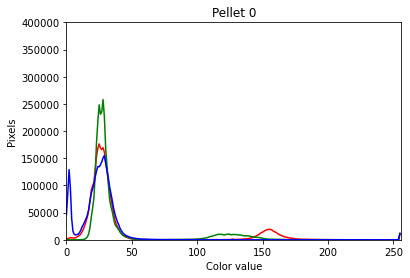

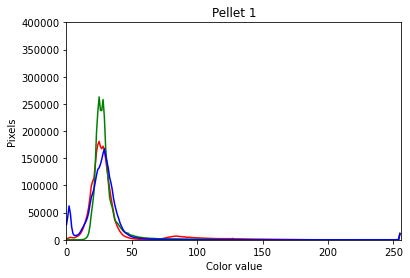

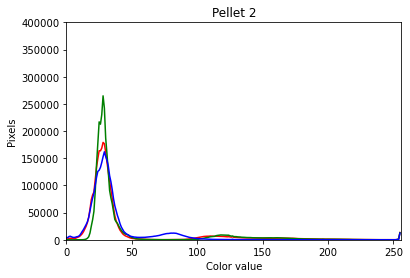

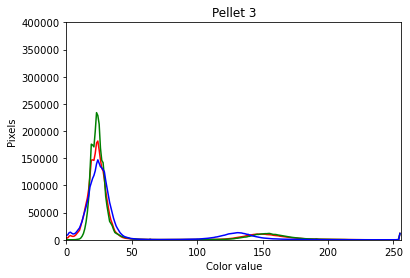

In [3]:
# --- Histograma de Cores - Matplotlib - Opção 1---#

# Tupla para selecionar as cores de cada canal
colors = ("red", "green", "blue")
channel_ids = (0, 1, 2)

# Histrograma com as três linhas, uma para cada cor
i = 0
for foto in images:
    plt.xlim([0, 256])
    for channel_id, c in zip(channel_ids, colors):
        histogram, bin_edges = np.histogram(
            foto[:, :, channel_id], bins=256, range=(0, 256)
        )
        plt.plot(bin_edges[0:-1], histogram, color=c)
    plt.ylim((0, 400000))
    plt.xlim((0, 256))
    plt.xlabel("Color value")
    plt.ylabel("Pixels")
    plt.title("Pellet %i" % i)
    i += 1
    plt.show()

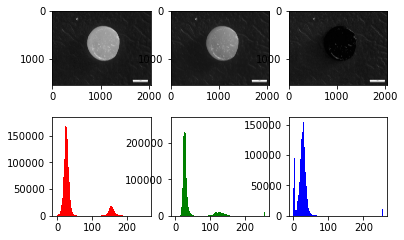

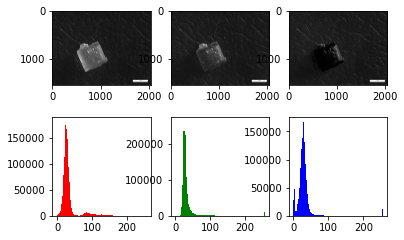

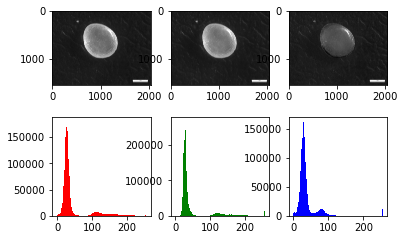

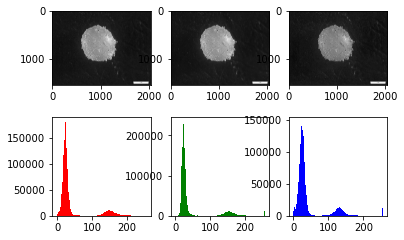

In [4]:
# --- Histograma de Cores - Scikit Image - Opção 2---#

import matplotlib.pyplot as plt
import numpy as np
import skimage

for foto in images:
    image = foto
    image_red, image_green, image_blue = image[:, :, 0], image[:, :, 1], image[:, :, 2]

    fig, ax = plt.subplots(2, 3)
    ax[0, 0].imshow(image_red, cmap="gray")
    ax[0, 1].imshow(image_green, cmap="gray")
    ax[0, 2].imshow(image_blue, cmap="gray")

    bins = np.arange(-0.5, 255 + 1, 1)
    ax[1, 0].hist(image_red.flatten(), bins=bins, color="r")
    ax[1, 1].hist(image_green.flatten(), bins=bins, color="g")
    ax[1, 2].hist(image_blue.flatten(), bins=bins, color="b")

# não consegui definir os limites para os gráficos para melhor comparação
# nem colocar título

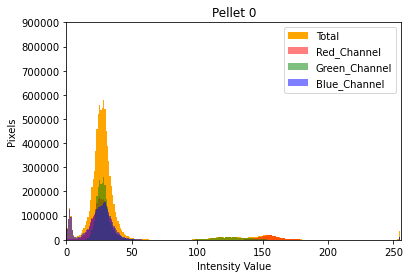

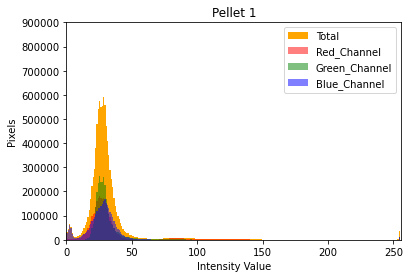

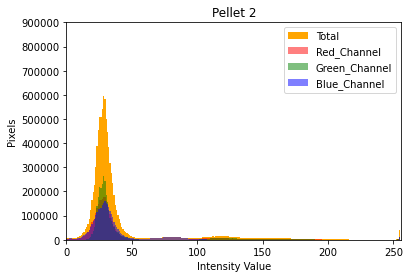

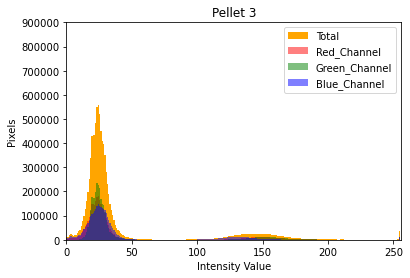

In [5]:
# --- Histograma de cores - Scikit Image - Opção 3 ---#

import matplotlib.pyplot as plt
from skimage import io

i = 0
for foto in images:
    _ = plt.hist(
        foto.ravel(),
        bins=256,
        color="orange",
    )
    _ = plt.hist(foto[:, :, 0].ravel(), bins=256, color="red", alpha=0.5)
    _ = plt.hist(foto[:, :, 1].ravel(), bins=256, color="Green", alpha=0.5)
    _ = plt.hist(foto[:, :, 2].ravel(), bins=256, color="Blue", alpha=0.5)
    _ = plt.ylim((0, 900000))
    _ = plt.xlim((0, 256))
    _ = plt.xlabel("Intensity Value")
    _ = plt.ylabel("Pixels")
    _ = plt.legend(["Total", "Red_Channel", "Green_Channel", "Blue_Channel"])
    _ = plt.title("Pellet %i" % i)
    i += 1
    plt.show()

In [6]:
# Descobrir como obter os dados das imagens (dados das análises do histograma)
# Fazer filtro do fundo